In [6]:
import numpy as np
import pandas as pd 
from skimage.data import imread
from skimage import draw
import matplotlib.pyplot as plt
import os
import pdb
from sklearn.cluster import KMeans

In [5]:
filename = '../../data/box_data.npz'
npzfile = np.load(filename)
npzfile.files
L1 = npzfile['L1']
L2 = npzfile['L2']
R0 = npzfile['R0']
C0 = npzfile['C0']
theta = npzfile['theta']
num_ships = npzfile['num_ships']
boxes = pd.read_csv('../../data/train_ship_boxes.csv',index_col=0)

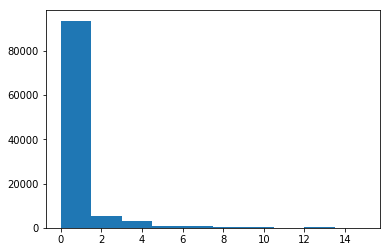

In [84]:
plt.hist(num_ships);

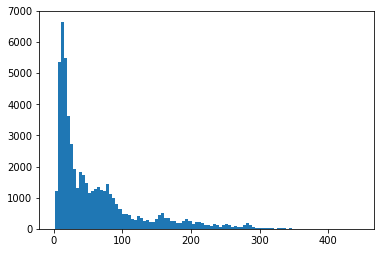

In [107]:
plt.hist(L1,bins=100);

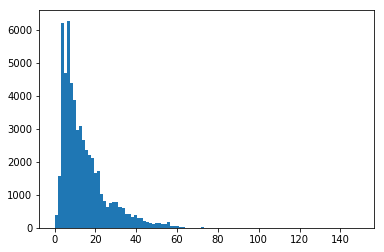

In [105]:
plt.hist(L2,bins=100);

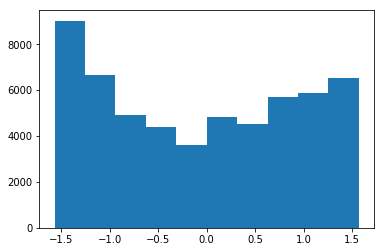

In [88]:
plt.hist(theta);

(array([  269., 12470., 16892., 10947.,  5866.,  3800.,  2342.,  1429.,
         1114.,   901.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

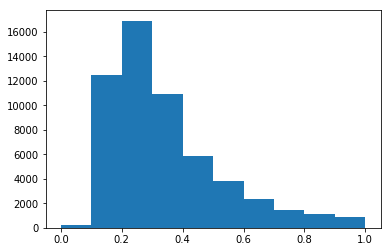

In [102]:
aspect_ratio = L2/L1
#aspect_ratio[aspect_ratio == np.inf] = np.nan
plt.hist(aspect_ratio)

In [85]:
sin_theta = np.sin(theta)
cos_theta = np.cos(theta)
x = np.stack((L1,L2,L1*sin_theta,L1*cos_theta),axis=1)

In [86]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init=20, max_iter=300).fit(x)

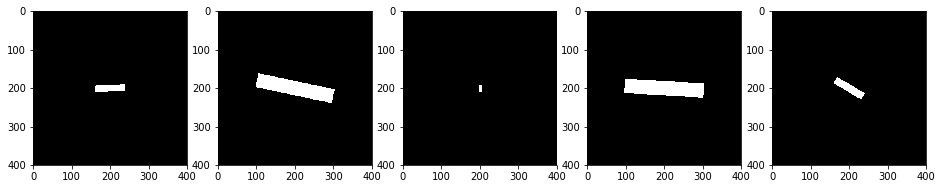

In [87]:
fig,ax = plt.subplots(1,5,figsize=(16,4))
for i,xi in enumerate(kmeans.cluster_centers_):
    img = np.zeros((400,400))
    theta_i = xi[2]/xi[3]
    L1_i = xi[0]
    L2_i = xi[1]
    R = np.array([[np.cos(theta_i),-np.sin(theta_i)],[np.sin(theta_i),np.cos(theta_i)]])
    box = 0.5*np.array([[L1_i,L2_i],[L1_i,-L2_i],[-L1_i,-L2_i],[-L1_i,L2_i]]).T
    box_rot = np.dot(R,box)
    rr, cc = draw.polygon(200+box_rot[0,:],200+box_rot[1,:],shape=(400,400))    
    img[rr,cc] = 1
    #ax[i//5,i%5].imshow(img,cmap='gray')
    ax[i].imshow(img,cmap='gray')

plt.show()

In [96]:
L1_k = kmeans.cluster_centers_[:,0]
L2_k = kmeans.cluster_centers_[:,1]
theta_k = kmeans.cluster_centers_[:,2]/kmeans.cluster_centers_[:,3]
outfile = '../../data/kmeans_results.npz'
np.savez(outfile,L1_k=L1_k,L2_k=L2_k,theta_k=theta_k)